In [1]:
from pykrx import stock
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform
import datetime
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
stock_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="ALL")})
stock_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))

kospi_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="ALL")})
kospi_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))

kosdaq_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="KOSDAQ")})
kosdaq_list['종목명'] = stock_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))


In [2]:
today = datetime.datetime.today()
month_ago = str(today.year) + str(today.month-1) + str(today.day)
month_ago2 = str(today.year) + str(today.month-2) + str(today.day)
today = str(today.year) + str(today.month) + str(today.day)
month_ago

'20211010'

In [3]:
shrink_kospi = stock.get_market_cap_by_ticker('20211001', market='KOSPI').sort_values('시가총액', ascending=False)
shrink_kospi = shrink_kospi[0:50]
shrink_kosdaq = stock.get_market_cap_by_ticker('20211001', market='KOSDAQ').sort_values('시가총액', ascending=False)
shrink_kosdaq = shrink_kosdaq[0:50]
name1 = []
name2 = []
for ticker in shrink_kospi.index:
    name1.append(kospi_list[kospi_list['종목코드'] == ticker]['종목명'].values[0])
for ticker in shrink_kosdaq.index:
    name2.append(kosdaq_list[kosdaq_list['종목코드'] == ticker]['종목명'].values[0])
total_name = name1 + name2
len(name1), len(name2), len(total_name)
total_name.remove('현대중공업')

In [4]:
def get_name(name, fromdate, todate):
    name = name
    ticker = stock_list.loc[stock_list['종목명']==name, '종목코드']
    df = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker)
    df = df.rename(columns={'시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
    df['ma20'] = df['Close'].rolling(window=20).mean() # 20일 이동표준편차
    df['stddev'] = df['Close'].rolling(window=20).std() # 20일 이동표준편차
    df['upper'] = df['ma20'] + 2*df['stddev'] # 상단밴드
    df['lower'] = df['ma20'] - 2*df['stddev'] # 하단밴드
    df = df[19:] # 20일 이동평균을 구했기 때문에 20번째 행부터 값이 들어가 있음
    df.insert(0, column='volatility', value=0)

    df['volatility'] = (df['upper'] - df['lower'])

    return df[::-1]


In [5]:
### filter 1 ###
# select = []
# for name in total_name:
#     tick = get_name(name, '20210401', '20211010')
#     if (tick['Close'][1] > tick['ma20'][1]) and (tick['Close'][2] < tick['ma20'][2]):
#         select.append(name)
# select

In [77]:
### filter 2 ###
select = []
for name in total_name:
    fromdate = '20210501'
    todate = '20211001'
    tick = get_name(name, fromdate, todate)
    
    try:
        for i in range(15):  
            if (tick['Close'][i] < tick['lower'][i]):
                select.append((name, i))
                break
    except:
        continue
len(select)

49

In [78]:
select[:5]

[('삼성전자', 0), ('SK하이닉스', 0), ('NAVER', 13), ('삼성바이오로직스', 2), ('삼성전자우', 0)]

In [86]:
select1 = []
for name, i in select:
    tick = get_name(name, fromdate, todate)
    
    try:
        if (tick['Close'][i-5] > tick['ma20'][i]) & (tick['Close'][i-7] > tick['ma20'][i-5]):
            select1.append(name)
            continue
    except:
        continue
len(select1)

16

In [88]:
select1

['삼성전자',
 '삼성전자우',
 '현대차',
 '기아',
 '현대모비스',
 '삼성물산',
 '한국전력',
 '삼성에스디에스',
 'KT&G',
 '두산중공업',
 '넷마블',
 'KT',
 '한온시스템',
 '엠씨넥스',
 'YBM넷',
 '아이스크림에듀']

In [89]:
result_df = pd.DataFrame(index=[todate, 'd+1', 'd+2', 'd+3', 'd+4', 'd+5'], columns=select1)
# result_df.iloc[1]['SK이노베이션'] = 3
# result_df.iloc[2]['삼성화재'] = 4
result_df

,삼성전자,삼성전자우,현대차,기아,현대모비스,삼성물산,한국전력,삼성에스디에스,KT&G,두산중공업,넷마블,KT,한온시스템,엠씨넥스,YBM넷,아이스크림에듀
20211001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d+1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d+3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d+4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d+5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
for name in select1:
    ticker = stock_list.loc[stock_list['종목명']==name, '종목코드']
    df = stock.get_market_ohlcv_by_date(fromdate=todate, todate='20211110', ticker=ticker)


    df = df.rename(columns={'시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
    df1 = df.copy()
    df1.insert(0, column='f_close', value=0)
    df1.insert(0, column='proportion', value=0)  

    for i in range(1, len(df1)):
        df1['f_close'][i] = df['Close'][i] - df['Close'][i-1]
        df1['proportion'][i] =  (df1['f_close'][i] / df1['Close'][i] * 100)

    for i in range(5):
        result_df.iloc[i][name] = df1.iloc[i]['proportion']

print(df1[:5])

C:\Users\ghdak\AppData\Local\Temp/ipykernel_19920/3089615846.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['f_close'][i] = df['Close'][i] - df['Close'][i-1]
C:\Users\ghdak\AppData\Local\Temp/ipykernel_19920/3089615846.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['proportion'][i] =  (df1['f_close'][i] / df1['Close'][i] * 100)


            proportion  f_close  Open  High   Low  Close  Volume
날짜                                                              
2021-10-01           0        0  7420  7420  7100   7100  117131
2021-10-05          -7     -480  6860  6990  6490   6620  312881
2021-10-06          -2     -190  6560  6840  6430   6430  195014
2021-10-07           4      290  6380  6740  6380   6720  103827
2021-10-08           1      110  6750  6910  6700   6830   97008


In [95]:
result_df

,삼성전자,삼성전자우,현대차,기아,현대모비스,삼성물산,한국전력,삼성에스디에스,KT&G,두산중공업,넷마블,KT,한온시스템,엠씨넥스,YBM넷,아이스크림에듀
20211001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d+1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d+3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d+4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d+5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\ghdak\AppData\Local\Temp/ipykernel_19920/486089962.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['f_vol'][i] = df['volatility'][i] - df['volatility'][i-1]
C:\Users\ghdak\AppData\Local\Temp/ipykernel_19920/486089962.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['f_ma20'][i] = df['ma20'][i] - df['ma20'][i-1]
C:\Users\ghdak\AppData\Local\Temp/ipykernel_19920/486089962.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

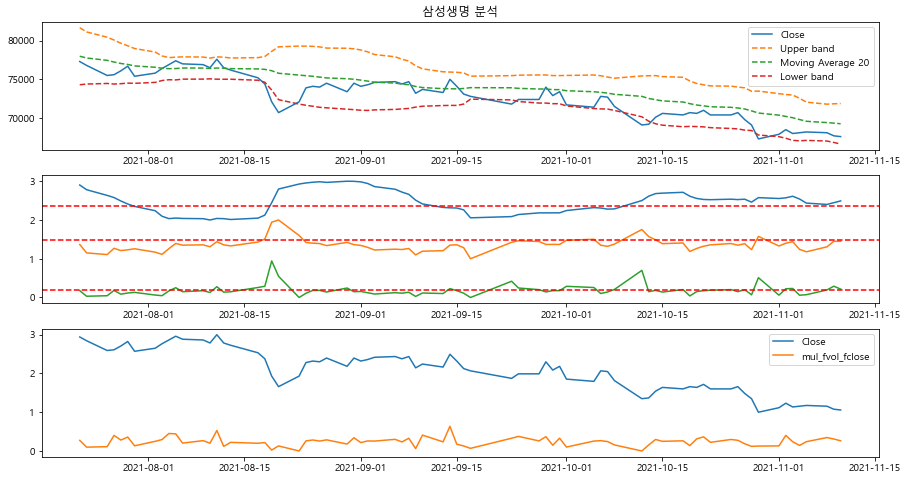

In [50]:
name = '삼성생명'
fromdate = str(20210625)
todate = str(20211110)
ticker = stock_list.loc[stock_list['종목명']==name, '종목코드']
df = stock.get_market_ohlcv_by_date(fromdate=fromdate, todate=todate, ticker=ticker)


df = df.rename(columns={'시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
df['ma20'] = df['Close'].rolling(window=20).mean() # 20일 이동평균
df['stddev'] = df['Close'].rolling(window=20).std() # 20일 이동표준편차
df['upper'] = df['ma20'] + 2*df['stddev'] # 상단밴드
df['lower'] = df['ma20'] - 2*df['stddev'] # 하단밴드
df = df[19:] # 20일 이동평균을 구했기 때문에 20번째 행부터 값이 들어가 있음
df['volatility'] = (df['upper'] - df['lower'])/2

df1 = df.copy().loc[:,('Close','ma20','volatility')]
df1.insert(0, column='f_close', value=0)
df1.insert(0, column='f_ma20', value=0)
df1.insert(0, column='f_vol', value=0)
df1.insert(0, column='ff_vol', value=0)

for i in range(1, len(df1)):
    df1['f_vol'][i] = df['volatility'][i] - df['volatility'][i-1]
    df1['f_ma20'][i] = df['ma20'][i] - df['ma20'][i-1]
    df1['f_close'][i] = df['Close'][i] - df['Close'][i-1]
for i in range(1, len(df1)):
    df1['ff_vol'][i] = df1['f_vol'][i] - df1['f_vol'][i-1]


scaler = MinMaxScaler()
df2 = df1.copy()
df2[:] = scaler.fit_transform(df2[:])


fig, ax = plt.subplots(3,1,figsize=(15,8))

ax[0].plot(df.index, df['Close'], label='Close')
ax[0].plot(df.index, df['upper'], linestyle='dashed', label='Upper band')
ax[0].plot(df.index, df['ma20'], linestyle='dashed', label='Moving Average 20')
ax[0].plot(df.index, df['lower'], linestyle='dashed', label='Lower band')
ax[0].legend(loc='best');
ax[0].set_title(f'{name} 분석')

ax[1].plot(df2['volatility']+2) 
ax[1].plot(df2['f_vol']+1)
ax[1].plot(df2['f_vol']*df2['ff_vol']) 
ax[1].axhline(df2['f_vol'].mean()+2, color='red', linestyle='--')
ax[1].axhline(df2['ff_vol'].mean()+1, color='red', linestyle='--')
ax[1].axhline((df2['ff_vol']*df2['f_vol']).mean(), color='red', linestyle='--')

ax[2].plot(df2['Close']*2 + 1)
ax[2].plot(df2['f_close'] * df2['ff_vol'])
# ax[2].plot(df2['f_close'] * df2['volatility'])

ax[2].legend(['Close', 'mul_fvol_fclose'])
plt.show()